# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import express as px
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go


## Carga de datos

In [2]:
def load_data(path_csv: str) -> pd.DataFrame:
    df = pd.read_csv(path_csv, sep=";", parse_dates=["Dates"])
    return df.sort_values("Dates")


In [3]:
df_raw = load_data("../data/raw/merged_output.csv")

In [4]:
df_raw.head()

,Dates,Air_Relat_Hum,Air_Temp,Wind_Dir,Solar_Rad,Wind_Speed,Rain
0,2025-03-18 04:52:09.826,83,10.04,77,6.0,2.0,0.0
1,2025-03-18 05:51:41.505,92,8.69,54,5.0,0.0,0.0
2,2025-03-18 06:51:15.036,92,8.64,52,3.0,7.0,0.0
3,2025-03-18 07:50:52.882,92,8.82,55,2.0,6.0,0.0
4,2025-03-18 08:50:31.363,92,9.13,47,6.0,9.0,0.0


## Estadísticas

In [5]:
df_raw.describe()

,Dates,Air_Relat_Hum,Air_Temp,Wind_Dir,Solar_Rad,Wind_Speed,Rain
count,1034,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2025-04-08 22:32:17.783594752,66.271760,11.781132,157.088008,5.892679,7.108027,0.056963
min,2025-03-18 04:52:09.826000,25.000000,0.480000,1.000000,0.000000,0.000000,0.000000
25%,2025-03-28 22:49:40.504250112,51.000000,7.400000,55.250000,0.000000,3.000000,0.000000
50%,2025-04-08 17:10:17.245500160,67.000000,11.100000,130.000000,0.000000,6.700000,0.000000
75%,2025-04-19 10:30:06.234749952,83.000000,15.407500,266.000000,6.000000,10.500000,0.000000
max,2025-05-04 08:49:32.409000,100.000000,27.660000,360.000000,59.600000,24.000000,10.000000
std,NaN,18.882544,5.771522,110.711835,11.867520,5.220559,0.683334


In [6]:
# Valores perdidos
missing_values = df_raw.isnull().sum()
missing_values

Dates            0
Air_Relat_Hum    0
Air_Temp         0
Wind_Dir         0
Solar_Rad        0
Wind_Speed       0
Rain             0
dtype: int64

## Gráficos

In [7]:
def simple_graph(df: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(10, 6))
    plt.plot(df[x], df[y], label=y, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

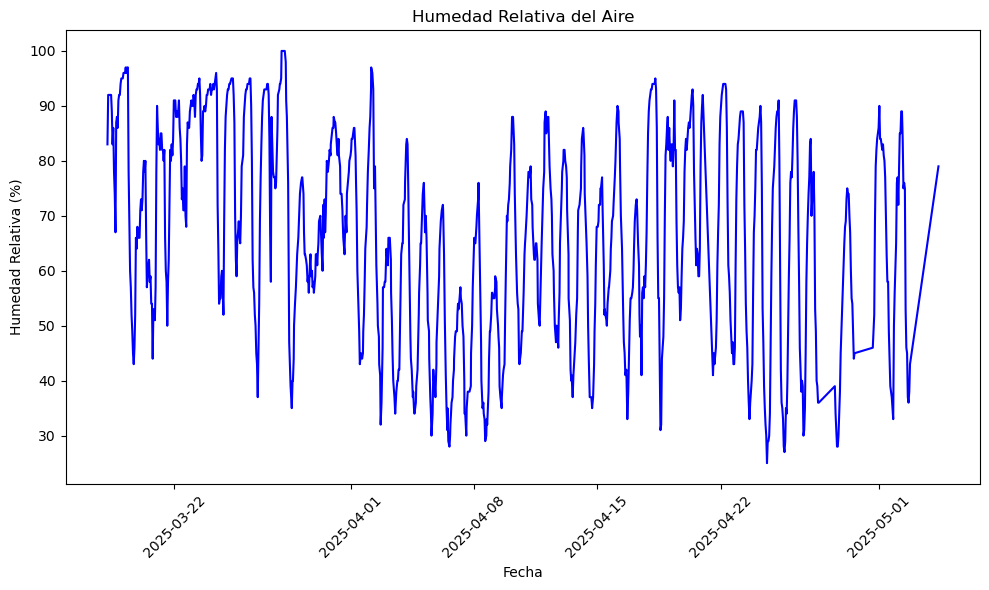

In [8]:
# Gráfico de Air_Relat_Hum con matplotlib
simple_graph(df_raw, 'Dates', 'Air_Relat_Hum', 'Humedad Relativa del Aire', 'Fecha', 'Humedad Relativa (%)')

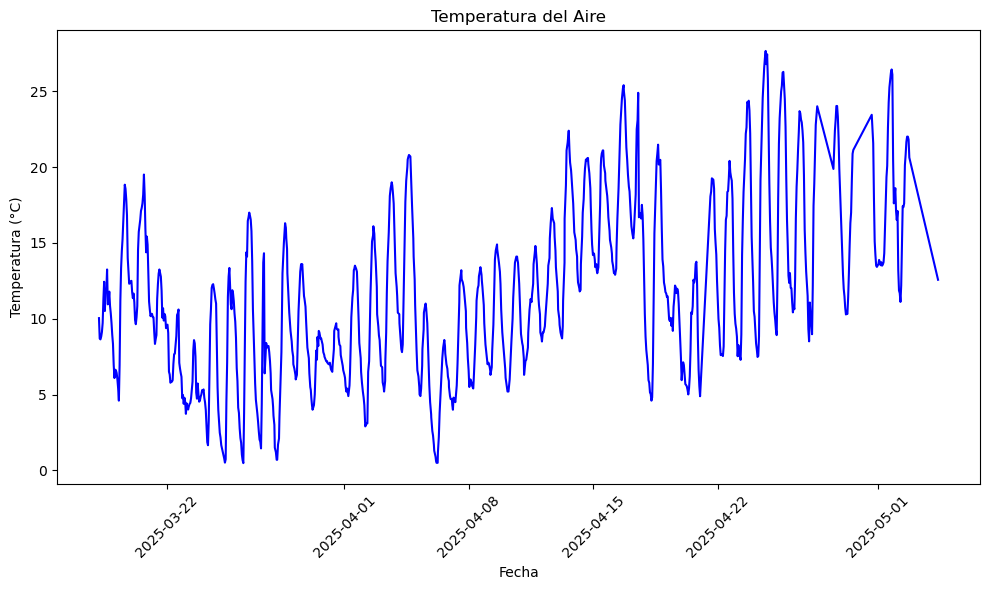

In [9]:
# Gráfico de Air_Temp
simple_graph(df_raw, 'Dates', 'Air_Temp', 'Temperatura del Aire', 'Fecha', 'Temperatura (°C)')


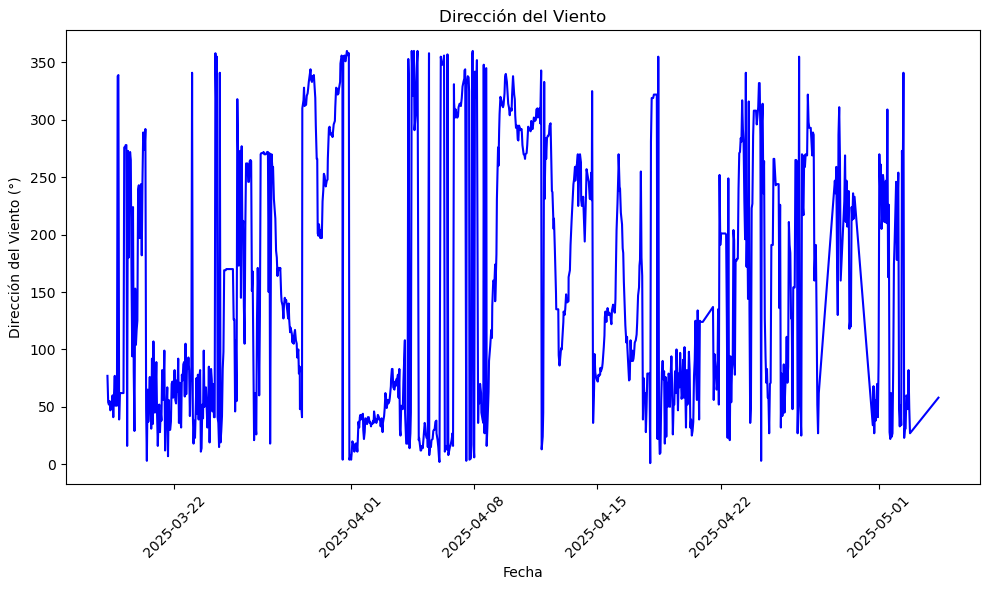

In [10]:
# Gráfico de Wind_Dir
simple_graph(df_raw, 'Dates', 'Wind_Dir', 'Dirección del Viento', 'Fecha', 'Dirección del Viento (°)')

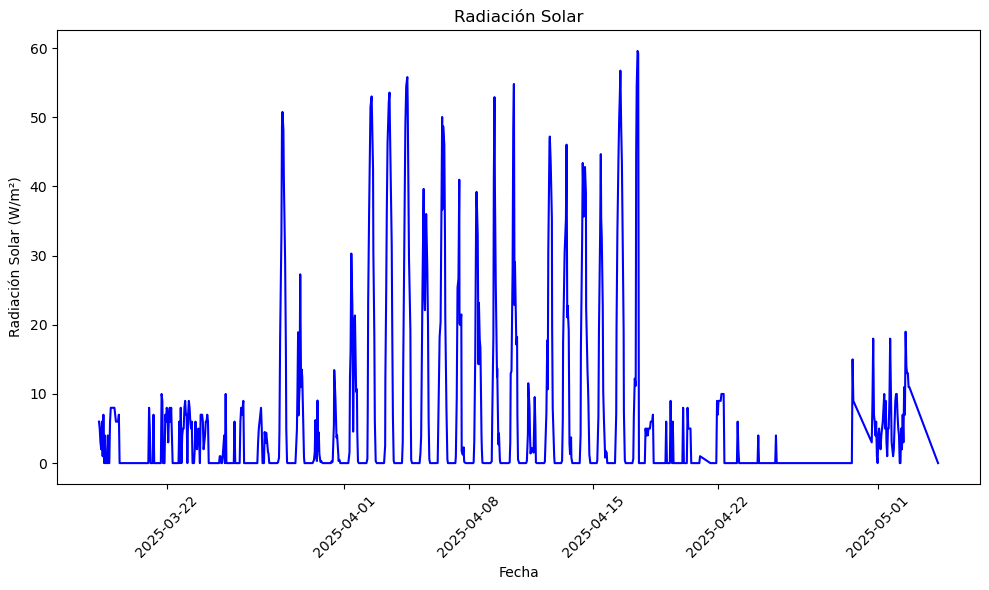

In [11]:
# Gráfico de Solar_Rad
simple_graph(df_raw, 'Dates', 'Solar_Rad', 'Radiación Solar', 'Fecha', 'Radiación Solar (W/m²)')

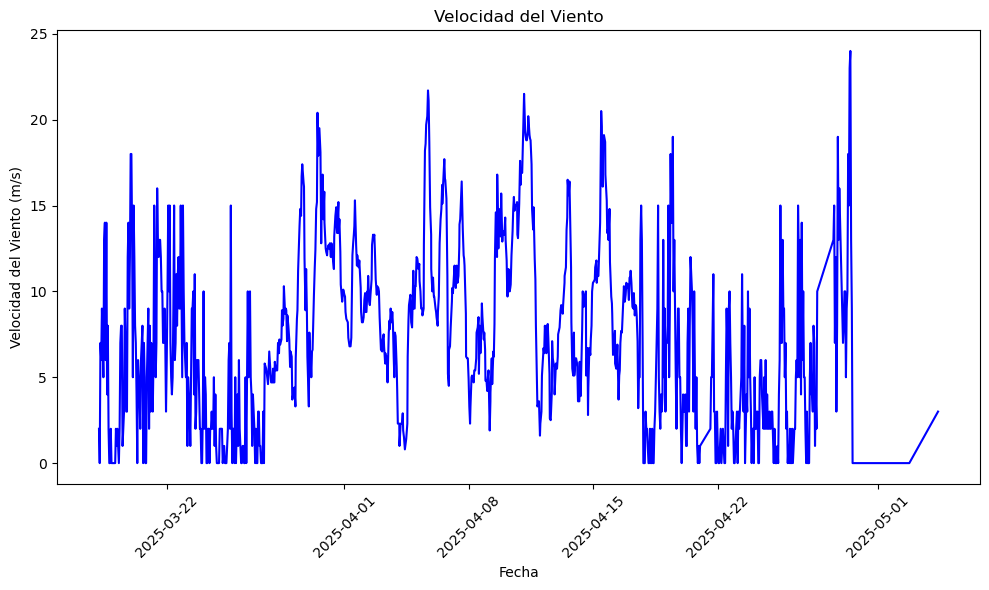

In [12]:
# Gráfico de Wind_Speed
simple_graph(df_raw, 'Dates', 'Wind_Speed', 'Velocidad del Viento', 'Fecha', 'Velocidad del Viento (m/s)')

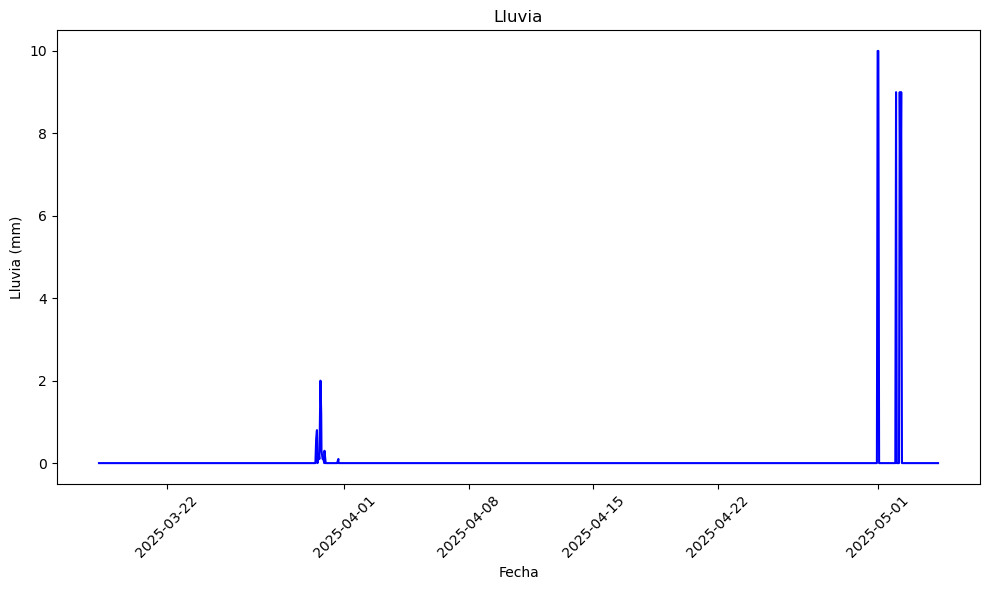

In [13]:
# Gráfico de Rain
simple_graph(df_raw, 'Dates', 'Rain', 'Lluvia', 'Fecha', 'Lluvia (mm)')

## Gráficos más complejos

In [14]:
df_rain_daily = (
    df_raw
    .set_index('Dates')['Rain']
    .resample('D')
    .sum()
    .fillna(0)
)

In [15]:
def make_rain_bar_series(df_daily):
    # Prepara arrays de fechas donde hubo lluvia
    non_zero = df_daily[df_daily.values > 0]
    tick_vals = non_zero.index
    tick_text = [d.strftime("%d %b") for d in tick_vals]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_daily.index,
        y=df_daily.values,
        name="Lluvia (mm)",
        width=0.8 * 24*60*60*1000,   # 0.8 días de ancho para que no se toquen
        marker=dict(
            color="rgba(30,144,255,0.6)",
            line=dict(color="rgba(30,144,255,1)", width=1.5)
        ),
        hovertemplate="%{x|%d %b %Y}<br><b>%{y:.1f} mm</b><extra></extra>"
    ))


    max_date = df_daily.idxmax()
    max_val  = df_daily.max()
    fig.add_annotation(
        x=max_date, y=max_val,
        text=f"Máx: {max_val:.1f} mm",
        showarrow=True, arrowhead=2, ax=0, ay=-30,
        font=dict(size=12, family="Arial", color="#1E90FF")
    )

    # 5) Layout general + mejora de ejes
    fig.update_layout(
        title=dict(text="<b>Lluvia diaria</b>", x=0.02, xanchor="left"),
        template="plotly_white",
        margin=dict(l=30, r=20, t=60, b=40),
        hovermode="x unified",
        bargap=0.2,
        xaxis=dict(
            title="Fecha",
            showgrid=True,
            gridcolor="rgba(200,200,200,0.2)",
            tickangle=-45,

            # Aquí definimos sólo los días con lluvia
            tickmode="array",
            tickvals=tick_vals,
            ticktext=tick_text,

            ticklabelmode="period",
        ),
        yaxis=dict(title="Lluvia (mm)",
                   showgrid=True, gridcolor="rgba(200,200,200,0.2)")
    )

    return fig




bar = make_rain_bar_series(df_rain_daily)
bar.show()


In [16]:
df_hum_daily = (
    df_raw
    .set_index('Dates')['Air_Relat_Hum']
    .resample('D')
    .mean()
    .fillna(0)
)

In [17]:
def make_humidity_scatter_series(df_daily):

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df_daily.index, y=df_daily.values, name="Humedad (%)",
        mode="lines+markers", line=dict(color="#4169E1", width=3, shape="spline"),
        marker=dict(size=6), hovertemplate="%{x|%d %b}<br>%{y:.0f}%<extra></extra>"
    ))


    max_date = df_daily.idxmax()
    max_val  = df_daily.max()
    fig.add_annotation(
        x=max_date, y=max_val,
        text=f"Máx: {max_val:.1f} %",
        showarrow=True, arrowhead=2, ax=0, ay=-30,
        font=dict(size=12, family="Arial", color="#4169E1")
    )

    min_date = df_daily.idxmin()
    min_val  = df_daily.min()
    fig.add_annotation(
        x=min_date, y=min_val,
        text=f"Mín: {min_val:.1f} %",
        showarrow=True, arrowhead=2, ax=0, ay=30,
        font=dict(size=12, family="Arial", color="#4169E1")
    )


    avg = df_daily.mean()
    fig.add_hline(
        y=avg,
        line_dash="dash",
        annotation_text=f"Media: {avg:.1f}%",
        annotation_position="bottom right",
        opacity=0.7
    )

       
    # 5) Layout general + mejora de ejes
    fig.update_layout(
        title=dict(text="<b>Humedad Diaria</b>", x=0.02, xanchor="left"),
        template="plotly_white",
        margin=dict(l=30, r=20, t=60, b=40),
        hovermode="x unified",
        bargap=0.2,
        xaxis=dict(
            title="Fecha",
            showgrid=True,
            gridcolor="rgba(200,200,200,0.2)",
            tickangle=-45,
        ),
        yaxis=dict(title="Humedad (%)",
                   showgrid=True, gridcolor="rgba(200,200,200,0.2)")
    )

    
    
    return fig




bar = make_humidity_scatter_series(df_hum_daily)
bar.show()


In [18]:
def make_rain_humidity_figure(df_rain: pd.Series, df_hum: pd.Series) -> go.Figure:
    # Aseguramos que ambos índices coincidan: unimos en un único DataFrame
    df = pd.concat([df_rain.rename('rain'), df_hum.rename('hum')], axis=1)

    # Creamos figura con eje secundario
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Ticks de lluvia sólo donde hay precipitación
    rain_non_zero = df['rain'][df['rain'] > 0].index

    # 2) Primer día de cada mes en el rango
    months = pd.date_range(start=df.index.min().replace(day=1),
                        end=df.index.max(),
                        freq='MS')

    # 3) Un día por semana (p.ej. siempre lunes)
    weeks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='W-MON')

    # Unimos y ordenamos
    tick_vals = sorted(set(rain_non_zero) | set(months) | set(weeks))

    # Y formateamos el texto (puedes ajustarlo a tu gusto)
    tick_text = [d.strftime('%d %b') for d in tick_vals]

    # 1) Trace de lluvia (barras)
    fig.add_trace(
        go.Bar(
            x=df.index,
            y=df['rain'],
            name="Lluvia (mm)",
            width=0.8 * 24*60*60*1000,
            marker=dict(
                color="rgba(30,144,255,0.6)",
                line=dict(color="rgba(30,144,255,1)", width=1.5)
            ),
            hovertemplate="%{x|%d %b %Y}<br><b>%{y:.1f} mm</b><extra></extra>"
        ),
        secondary_y=False
    )

    # 2) Trace de humedad (línea + markers)
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['hum'],
            name="Humedad (%)",
            mode="lines+markers",
            line=dict(color="#4169E1", width=3, shape="spline"),
            marker=dict(size=6),
            hovertemplate="%{x|%d %b %Y}<br><b>%{y:.0f} %</b><extra></extra>"
        ),
        secondary_y=True
    )

    # 3) Anotaciones de máximos y mínimos
    # Lluvia máximo
    rain_max_date = df['rain'].idxmax()
    rain_max_val  = df['rain'].max()
    fig.add_annotation(
        x=rain_max_date, y=rain_max_val,
        text=f"Máx lluvia: {rain_max_val:.1f} mm",
        showarrow=True, arrowhead=2, ax=0, ay=-30,
        font=dict(size=12, family="Arial", color="#1E90FF"),
        secondary_y=False
    )
    

    

    # 5) Layout y ejes
    fig.update_layout(
        title=dict(text="<b>Precipitación y Humedad Diaria</b>", x=0.02, xanchor="left"),
        template="plotly_white",
        margin=dict(l=30, r=20, t=60, b=40),
        hovermode="x unified",
        bargap=0.2,
        legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center")
    )
    fig.update_xaxes(
        title_text="Fecha",
        showgrid=True,
        gridcolor="rgba(200,200,200,0.2)",
        tickangle=-45,
        tickmode="array",
        tickvals=tick_vals,
        ticktext=tick_text,
        ticklabelmode="period"
    )
    fig.update_yaxes(
        title_text="Lluvia (mm)",
        showgrid=True,
        gridcolor="rgba(200,200,200,0.2)",
        rangemode='tozero',  # Aseguramos que el eje empieza en 0
        secondary_y=False
    )
    fig.update_yaxes(
        title_text="Humedad (%)",
        showgrid=True,
        gridcolor="rgba(200,200,200,0.2)",
        rangemode='tozero',  # Aseguramos que el eje empieza en 0
        secondary_y=True
    )


    return fig

rain_hum_fig = make_rain_humidity_figure(df_rain_daily, df_hum_daily)
rain_hum_fig.show()

In [19]:
df_temp_daily = (
    df_raw
    .set_index('Dates')['Air_Temp']
    .resample('D')
    .mean()
    .fillna(0)
)

In [1]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

def make_temp_daily_figure_from_hourly(df_hourly: pd.DataFrame, col: str = "Air_Temp") -> go.Figure:
    """
    Toma datos horarios en df_hourly con índice datetime y columna de temperatura,
    agrega a diario (min, mean, max) y dibuja una figura combinada:

      • Banda min–máx.
      • Línea spline de la media.
      • Líneas dash de min y max.
      • Ticks X: primer día de mes + un lunes/semana.
    """
    # 1) Crear DataFrame diario con min/mean/max
    dfg = df_hourly[col].resample("D").agg(["min", "mean", "max"])
    dfg.columns = ["temp_min", "temp_mean", "temp_max"]

    # 2) Calcular ticks para el eje X (primer día de mes + lunes)
    date_range = pd.date_range(start=dfg.index.min(), end=dfg.index.max(), freq='D')
    
    # Primer día de cada mes
    first_days = date_range[date_range.day == 1]
    
    # Lunes de cada semana (aproximadamente)
    mondays = date_range[date_range.weekday == 0]  # 0 = lunes
    
    # Combinar y ordenar los ticks
    tick_dates = pd.to_datetime(list(set(first_days.tolist() + mondays.tolist())))
    tick_dates = tick_dates.sort_values()
    
    # Filtrar solo los que están en nuestro rango de datos
    tick_dates = tick_dates[(tick_dates >= dfg.index.min()) & (tick_dates <= dfg.index.max())]

    # 3) Construir figura
    fig = go.Figure()

    # Banda min–máx usando técnica de relleno y "borrado"
    # Primero: rellenar desde cero hasta temp_max
    fig.add_trace(go.Scatter(
        x=dfg.index,
        y=dfg["temp_max"],
        fill="tozeroy",
        fillcolor="rgba(255,99,71,0.15)",
        line=dict(color="rgba(255,99,71,0)"),  # Línea invisible
        name="Rango min–máx",
        hoverinfo="skip",
        showlegend=True
    ))
    
    # Segundo: "quitar" el relleno desde cero hasta temp_min con color de fondo
    fig.add_trace(go.Scatter(
        x=dfg.index,
        y=dfg["temp_min"],
        fill="tozeroy",
        fillcolor="white",  # Color de fondo para "borrar"
        line=dict(color="rgba(255,99,71,0)"),  # Línea invisible
        hoverinfo="skip",
        showlegend=False
    ))

    # Media spline + markers
    fig.add_trace(go.Scatter(
        x=dfg.index, 
        y=dfg["temp_mean"],
        mode="lines+markers",
        line=dict(color="crimson", width=3, shape="spline", smoothing=1.3),
        marker=dict(size=5, symbol="circle", color="crimson"),
        name="Media",
        hovertemplate="%{x|%d %b %Y}<br>Media: %{y:.1f}°C<extra></extra>"
    ))

    # Línea de mínima (dash)
    fig.add_trace(go.Scatter(
        x=dfg.index, 
        y=dfg["temp_min"],
        mode="lines",
        line=dict(color="blue", width=2, dash="dash"),
        name="Mínima",
        hovertemplate="%{x|%d %b %Y}<br>Mín: %{y:.1f}°C<extra></extra>"
    ))
    
    # Línea de máxima (dash)
    fig.add_trace(go.Scatter(
        x=dfg.index, 
        y=dfg["temp_max"],
        mode="lines",
        line=dict(color="red", width=2, dash="dash"),
        name="Máxima",
        hovertemplate="%{x|%d %b %Y}<br>Máx: %{y:.1f}°C<extra></extra>"
    ))

    # 4) Layout y ejes
    fig.update_layout(
        title=dict(
            text="<b>Temperatura Diaria</b>", 
            x=0.02, 
            xanchor="left",
            font=dict(size=16)
        ),
        legend=dict(
            orientation="h", 
            y=1.02, 
            x=0.5, 
            xanchor="center",
            bgcolor="rgba(255,255,255,0.8)"
        ),
        template="plotly_white",
        margin=dict(l=50, r=20, t=80, b=60),
        hovermode="x unified",
        height=500
    )
    
    fig.update_xaxes(
        title_text="Fecha",
        tickmode="array",
        tickvals=tick_dates,
        ticktext=[d.strftime("%d %b") if d.day != 1 else d.strftime("%d %b %Y") for d in tick_dates],
        tickangle=-45,
        showgrid=True,
        gridcolor="rgba(200,200,200,0.3)"
    )
    
    fig.update_yaxes(
        title_text="Temperatura (°C)",
        showgrid=True, 
        gridcolor="rgba(200,200,200,0.3)",
        zeroline=True, 
        zerolinecolor="lightgrey",
        zerolinewidth=1
    )

    return fig

In [51]:
df_raw['Dates'] = pd.to_datetime(df_raw['Dates'])
df_raw.set_index('Dates', inplace=True)
fig = make_temp_daily_figure_from_hourly(df_raw, col="Air_Temp")
fig.show()

In [63]:
def make_wind_rose(
    df: pd.DataFrame,
    dir_col: str = 'Wind_Dir',
    speed_col: str = 'Wind_Speed',
    speed_bins: list = [0, 2, 5, 8, None],
    speed_labels: list = None,
    colors: dict = None,
    calm_threshold: float = 2,
    circle_bgcolor: str = '#F9F9F9',
) -> go.Figure:
    # Definir etiquetas y colores por defecto
    if speed_labels is None:
        speed_labels = ['Calma', 'Suave', 'Moderado', 'Fuerte']
    if colors is None:
        colors = {
            'Calma': '#E5E5E5', 'Suave': '#A1D99B',
            'Moderado': '#31A354', 'Fuerte': '#006D2C'
        }

    # Cardinales y datos
    cardinals = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    angles = np.arange(0, 360, 45)
    dfc = df.copy()
    dfc['dir_norm'] = dfc[dir_col] % 360
    dfc['dir_bin'] = pd.cut(
        dfc['dir_norm'], bins=np.arange(0, 361, 45),
        labels=cardinals, right=False
    )

    # Velocidad bins\    
    vmax = dfc[speed_col].max()
    bins = speed_bins.copy()
    if bins[-1] is None:
        bins[-1] = vmax + 1
    dfc['speed_bin'] = pd.cut(
        dfc[speed_col], bins=bins,
        labels=speed_labels, right=False
    )

    # Conteos y porcentajes
    group = dfc.dropna(subset=['dir_bin', 'speed_bin'])
    ct = (group.groupby(['dir_bin','speed_bin']).size()
          .unstack(fill_value=0)
          .reindex(index=cardinals, columns=speed_labels, fill_value=0))
    pct = ct.div(ct.sum().sum()) * 100
    max_pct = pct.values.max() * 1.1

    # Figura
    fig = go.Figure()
    # Barras apiladas
    for lbl in speed_labels:
        fig.add_trace(go.Barpolar(
            r=pct[lbl].values, theta=angles,
            name=lbl, marker_color=colors[lbl],
            hovertemplate=(
                '<b>%{theta}° (%{text})</b><br>'
                'Categoría: ' + lbl + '<br>'
                '%.1f%%<br>'
                'Conteo: %{' + 'customdata' + '}<extra></extra>'
            ), text=cardinals, customdata=ct[lbl].values
        ))
    # Vector medio
    th = np.deg2rad(dfc['dir_norm'])
    u, v = dfc[speed_col]*np.sin(th), dfc[speed_col]*np.cos(th)
    um, vm = u.mean(), v.mean()
    vec_speed = np.hypot(um, vm)
    vec_dir = (np.rad2deg(np.arctan2(um, vm)) + 360) % 360
    fig.add_trace(go.Scatterpolar(
        r=[0, vec_speed], theta=[vec_dir, vec_dir],
        mode='lines', line=dict(color='#333', width=3), name='Vector Medio'
    ))
    fig.add_trace(go.Scatterpolar(
        r=[vec_speed], theta=[vec_dir], mode='markers',
        marker_symbol='diamond', marker=dict(size=12, color='#333'), showlegend=False
    ))

    # Velocidad media por sector
    avg_by_dir = dfc.groupby('dir_bin')[speed_col].mean().reindex(cardinals)

    inline_labels = [f'{d} ({avg_by_dir[d]:.1f} m/s)' for d in cardinals]
    
    # Anotación de calma
    calm_pct = (dfc[speed_col] < calm_threshold).mean() * 100
    fig.add_annotation(
        x=0.5, y=1.2, xref='paper', yref='paper',
        text=f'<b>Calma (< {calm_threshold} m/s): {calm_pct:.1f}%</b>',
        showarrow=False, font=dict(size=12)
    )

    # Layout
    fig.update_layout(
        template='plotly_white', paper_bgcolor='white',
        legend=dict(title='Velocidad (m/s)', orientation='h',
                    yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
        polar=dict(
            bgcolor=circle_bgcolor,
            angularaxis=dict(
                tickmode='array', tickvals=angles,
                ticktext=inline_labels,
                rotation=90, direction='clockwise',
                tickfont=dict(size=12)
            ),
            radialaxis=dict(
                tickmode='array', tickvals=np.linspace(0, max_pct, 5),
                ticktext=[f'{v:.0f}%' for v in np.linspace(0, max_pct, 5)],
                angle=45, range=[0, max_pct], gridcolor='#ccc', gridwidth=1,
                tickfont=dict(size=10, color='#000'), ticks='outside',
                side='clockwise', ticklen=5
            )
        ), margin=dict(l=50, r=50, t=100, b=50)
    )
    return fig


In [64]:
fig = make_wind_rose(df_raw)
fig.show()

C:\Users\germa\AppData\Local\Temp\ipykernel_20712\235822679.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\germa\AppData\Local\Temp\ipykernel_20712\235822679.py:78: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

